In [2]:
import warnings
warnings.filterwarnings("ignore")


#**GARCH Model for  CAIRO Stock  Forecasting**
Model is used to forecast the volatility (jump) instead of actual price.

In [3]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 24.7 MB/s eta 0:00:00


In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np
import scipy.stats as stats

#**CAIRO Stock Exchange Top 10 Stocks Volatillity**

In [5]:
egx_tickers = ['ORAS.CA', 'COMI.CA', 'EFIC.CA', 'JUFO.CA', 'ETEL.CA',
               'SWDY.CA', 'CIEB.CA', 'PHAR.CA', 'HRHO.CA', 'DSCW.CA']

start_date = '1900-01-01'
end_date = '2023-01-01'

# Download data
data = yf.download(egx_tickers, start=start_date, end=end_date)['Adj Close']


[*********************100%***********************]  10 of 10 completed


In [6]:



data.to_csv('egx_stock_data.csv')
print("Data saved to BUX_stock_data.csv")

Data saved to BUX_stock_data.csv


In [7]:
print(data.head())


Ticker                     CIEB.CA   COMI.CA  DSCW.CA   EFIC.CA  ETEL.CA  \
Date                                                                       
2000-11-27 00:00:00+00:00      NaN  0.418611      NaN  0.861954      NaN   
2000-11-28 00:00:00+00:00      NaN  0.418611      NaN  0.861954      NaN   
2000-11-29 00:00:00+00:00      NaN  0.418611      NaN  0.861954      NaN   
2000-11-30 00:00:00+00:00      NaN  0.403823      NaN  0.845240      NaN   
2000-12-03 00:00:00+00:00      NaN  0.403823      NaN  0.845240      NaN   

Ticker                     HRHO.CA  JUFO.CA  ORAS.CA   PHAR.CA  SWDY.CA  
Date                                                                     
2000-11-27 00:00:00+00:00      NaN      NaN      NaN  0.878986      NaN  
2000-11-28 00:00:00+00:00      NaN      NaN      NaN  0.878986      NaN  
2000-11-29 00:00:00+00:00      NaN      NaN      NaN  0.878986      NaN  
2000-11-30 00:00:00+00:00      NaN      NaN      NaN  0.878986      NaN  
2000-12-03 00:00:00+00:

1. ORAS.CA (Orascom Construction Industries)
Sector: Construction & Engineering
Description: Orascom is a leading engineering and construction contractor operating in the Middle East and North Africa (MENA) region. It is involved in large-scale infrastructure projects, industrial facilities, and power generation.
2. COMI.CA (Commercial International Bank - CIB)
Sector: Banking
Description: CIB is Egypt's largest private-sector bank, providing banking services to individuals, small businesses, and corporations. It is a major player in the financial sector and widely regarded for its financial performance and innovation.
3. EFIC.CA (Egyptian Financial and Industrial Company)
Sector: Chemicals & Fertilizers
Description: EFIC specializes in the production of fertilizers and chemicals, catering to agricultural and industrial markets. The company plays a crucial role in Egypt's agricultural economy.
4. JUFO.CA (Juhayna Food Industries)
Sector: Food & Beverage
Description: Juhayna is a market leader in the production of dairy products, juices, and other beverages in Egypt. It has a strong consumer base and a significant share of the packaged food industry.
5. ETEL.CA (Telecom Egypt)
Sector: Telecommunications
Description: Telecom Egypt is the country’s largest telecommunications company, offering fixed-line, internet, and mobile services. It plays a pivotal role in Egypt's digital infrastructure development.
6. SWDY.CA (Elsewedy Electric)
Sector: Energy & Electrical Equipment
Description: Elsewedy Electric is a major provider of integrated energy solutions, including power cables, transformers, and electrical equipment. It operates across Africa and the Middle East.
7. CIEB.CA (Credit Agricole Egypt)
Sector: Banking
Description: Credit Agricole Egypt is a subsidiary of the French banking group Credit Agricole. It provides a wide range of financial products and services to individuals and businesses in Egypt.
8. PHAR.CA (Pharco Pharmaceuticals)
Sector: Pharmaceuticals
Description: Pharco is one of Egypt’s leading pharmaceutical manufacturers, producing a variety of medicines, including generics and over-the-counter drugs, for the local and international markets.
9. HRHO.CA (EFG Hermes)
Sector: Financial Services
Description: EFG Hermes is a leading investment bank in the MENA region. It offers asset management, private equity, brokerage, and investment banking services. It is a key player in regional financial markets.
10. DSCW.CA (Dice Sport & Casual Wear)
Sector: Textiles & Apparel
Description: Dice is a manufacturer and retailer of casual wear and sportswear. It caters to both local and international markets, making it a significant player in Egypt’s textile industry.


In [8]:
data.head()

Ticker,CIEB.CA,COMI.CA,DSCW.CA,EFIC.CA,ETEL.CA,HRHO.CA,JUFO.CA,ORAS.CA,PHAR.CA,SWDY.CA
Date,,,,,,,,,,
2000-11-27 00:00:00+00:00,NaN,0.418611,NaN,0.861954,NaN,NaN,NaN,NaN,0.878986,NaN
2000-11-28 00:00:00+00:00,NaN,0.418611,NaN,0.861954,NaN,NaN,NaN,NaN,0.878986,NaN
2000-11-29 00:00:00+00:00,NaN,0.418611,NaN,0.861954,NaN,NaN,NaN,NaN,0.878986,NaN
2000-11-30 00:00:00+00:00,NaN,0.403823,NaN,0.845240,NaN,NaN,NaN,NaN,0.878986,NaN
2000-12-03 00:00:00+00:00,NaN,0.403823,NaN,0.845240,NaN,NaN,NaN,NaN,0.878986,NaN


In [9]:
returns = data.pct_change().dropna()

# Here we create an empty dictionary to store the GARCH model results for each stock
# Set up GARCH modeling for each stock

In [10]:

garch_results = {}
for ticker in egx_tickers:
    model = arch_model(returns[ticker], vol='Garch', p=1, q=1)
    garch_results[ticker] = model.fit(disp='off')
    print(f"GARCH Model fit for {ticker} complete.")

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


GARCH Model fit for ORAS.CA complete.
GARCH Model fit for COMI.CA complete.
GARCH Model fit for EFIC.CA complete.
GARCH Model fit for JUFO.CA complete.
GARCH Model fit for ETEL.CA complete.
GARCH Model fit for SWDY.CA complete.
GARCH Model fit for CIEB.CA complete.
GARCH Model fit for PHAR.CA complete.
GARCH Model fit for HRHO.CA complete.
GARCH Model fit for DSCW.CA complete.


The Visualization  Part For the Bucharest Aviv Stocks

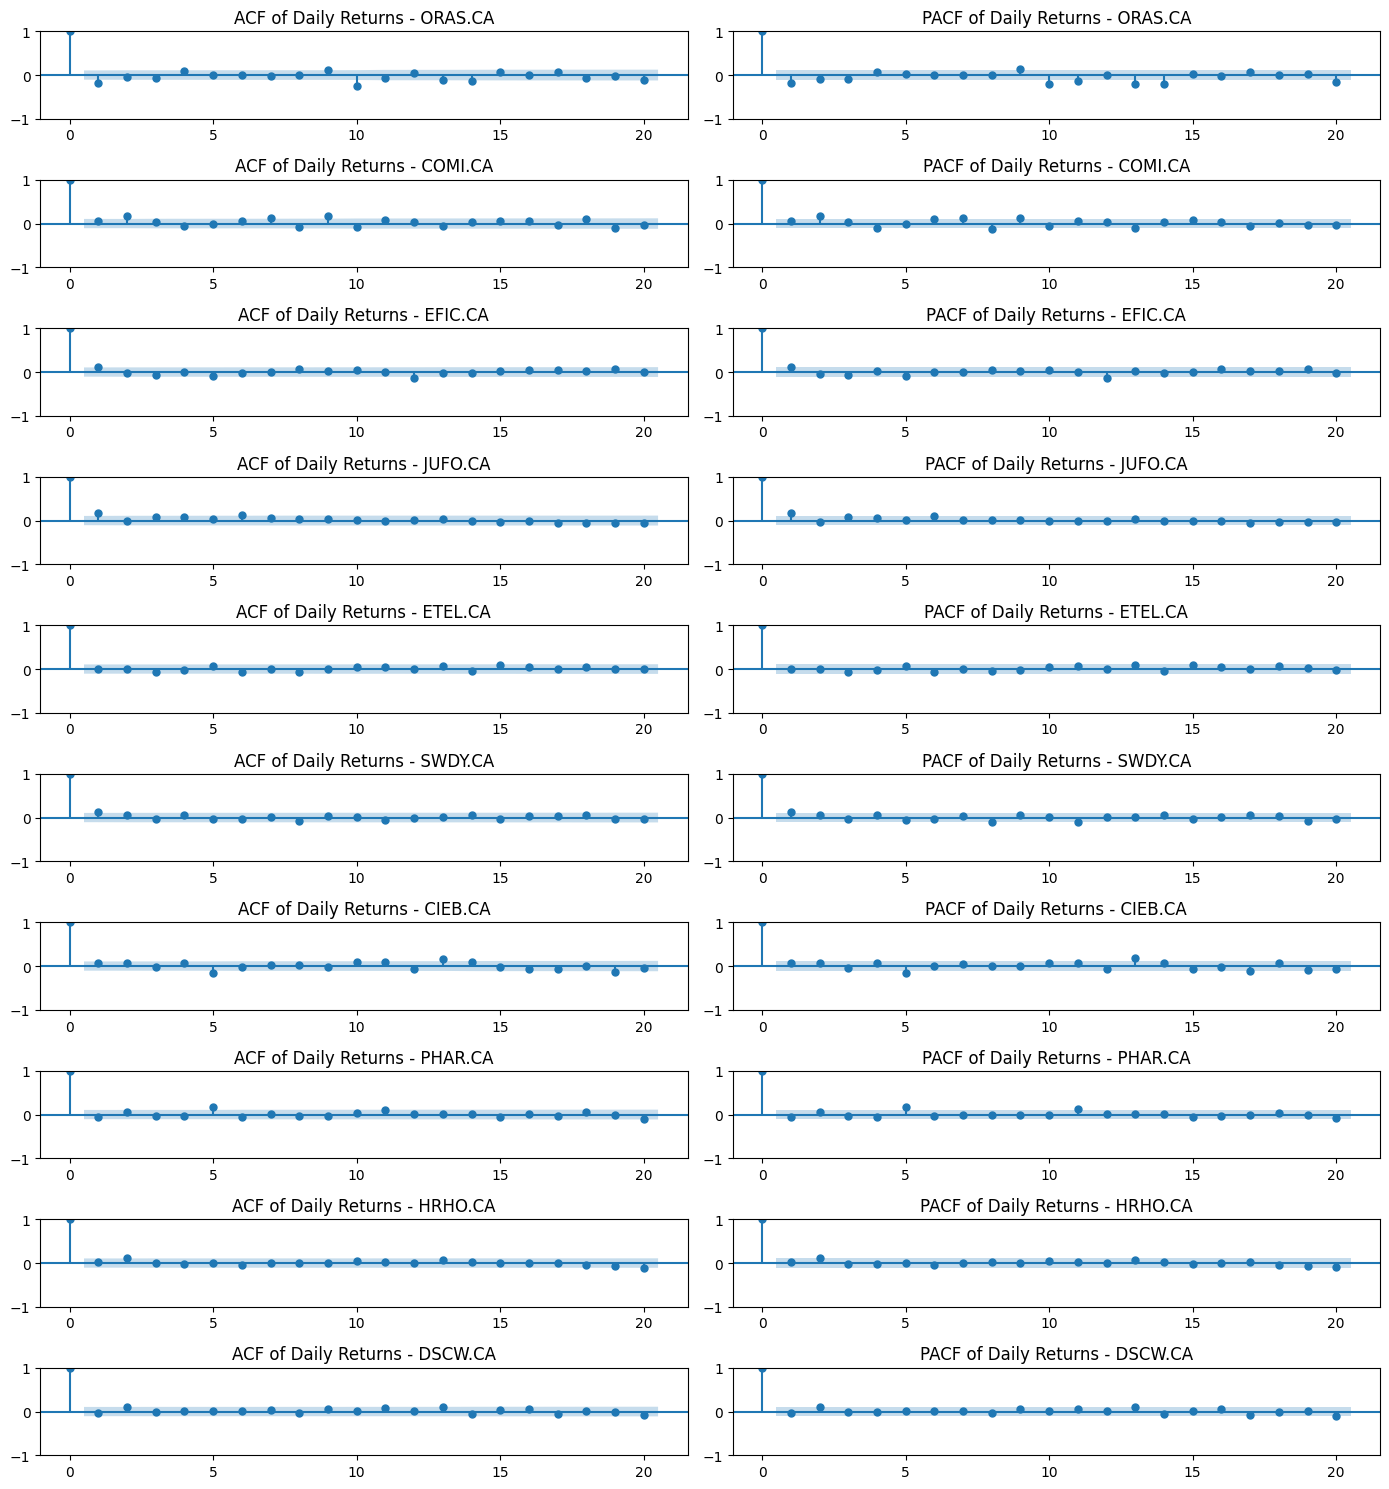

In [11]:
plt.figure(figsize=(14, 15))

for i, ticker in enumerate(egx_tickers):
    # ACF Plot
    plt.subplot(10, 2, 2 * i + 1)
    plot_acf(returns[ticker], ax=plt.gca(), lags=20)
    plt.title(f"ACF of Daily Returns - {ticker}")

    # PACF Plot
    plt.subplot(10, 2, 2 * i + 2)
    plot_pacf(returns[ticker], ax=plt.gca(), lags=20)
    plt.title(f"PACF of Daily Returns - {ticker}")

plt.tight_layout()
plt.show()


The Above we can see the ACF And PACF Plots for the data  which is   provided  via visuallization for all the shares

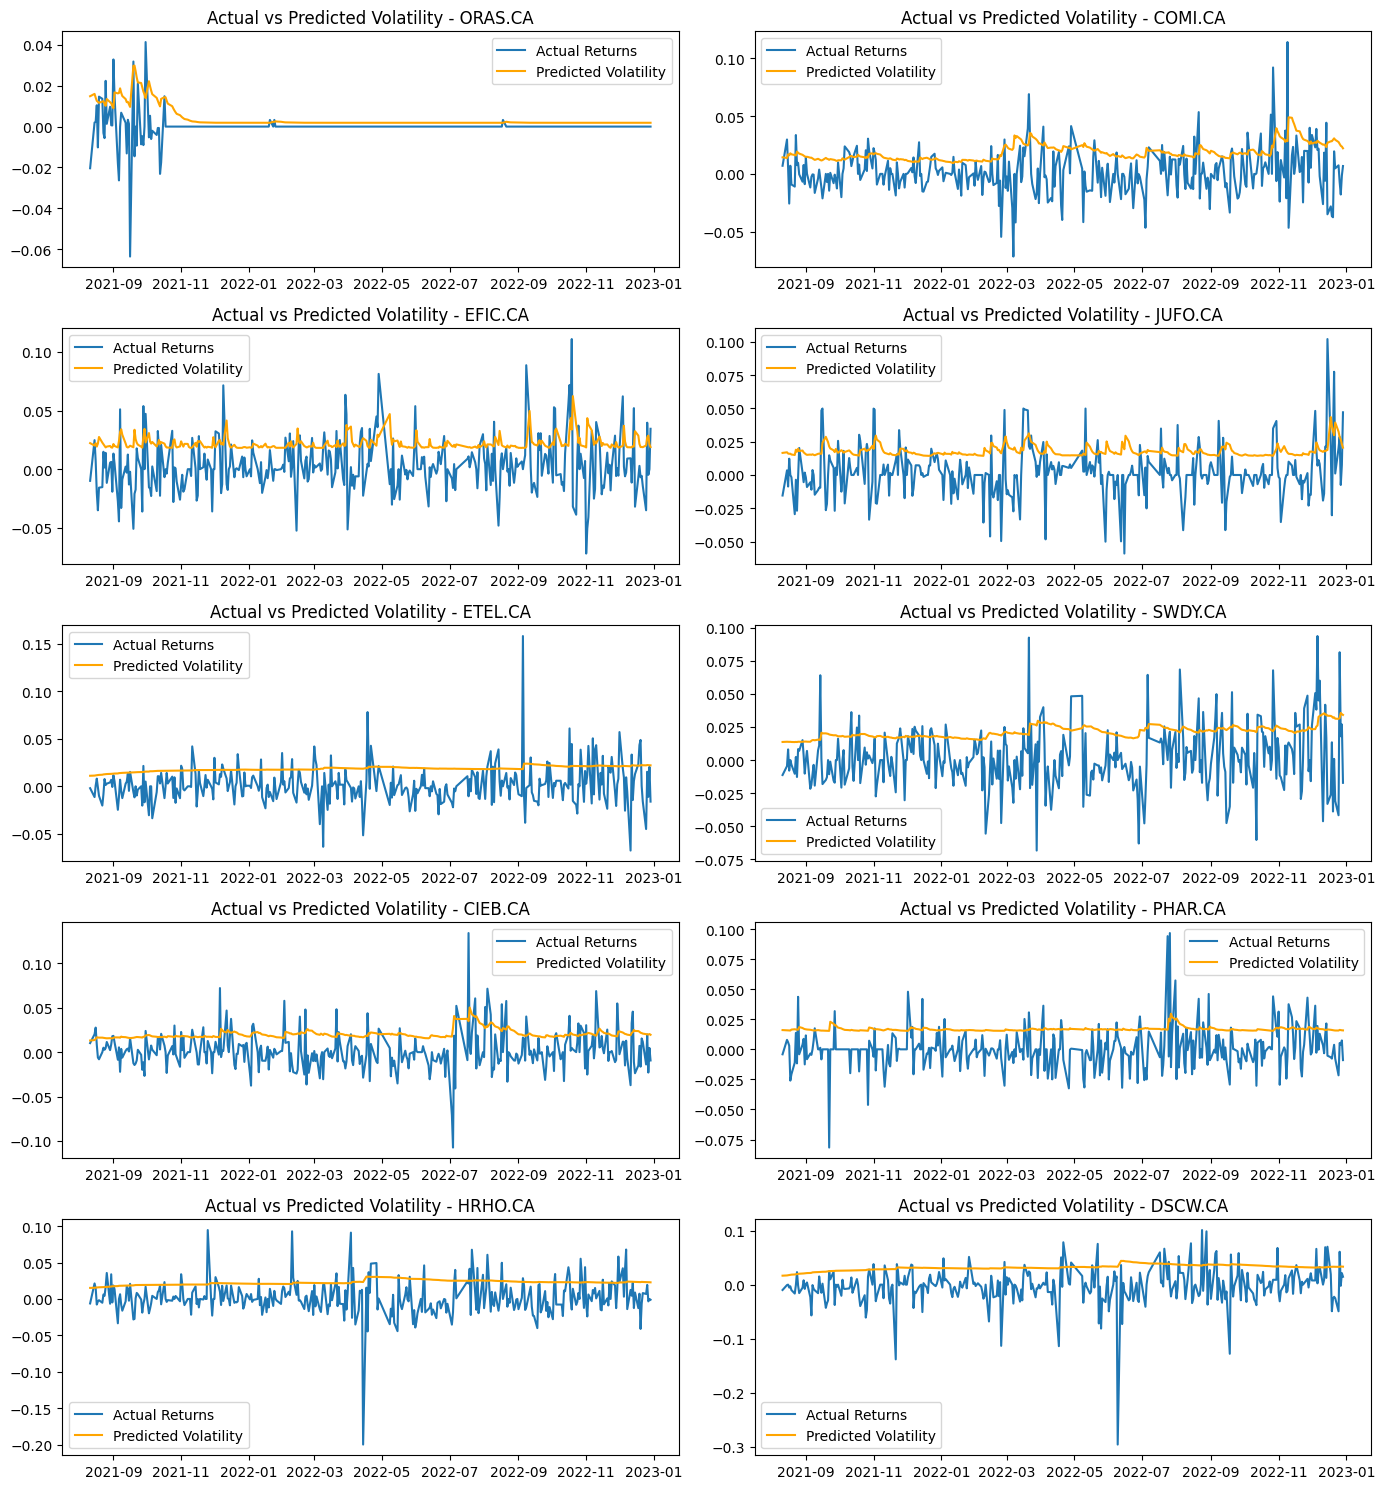

In [12]:
plt.figure(figsize=(14, 15))
for i, ticker in enumerate(egx_tickers):
    plt.subplot(5, 2, i + 1)
    garch_volatility = garch_results[ticker].conditional_volatility
    plt.plot(returns[ticker], label='Actual Returns')
    plt.plot(garch_volatility, color='orange', label='Predicted Volatility')
    plt.title(f'Actual vs Predicted Volatility - {ticker}')
    plt.legend()

plt.tight_layout()
plt.show()

The Above we  see  the  comparision and relationship between the   the actual and predicted  volatillity of the shares

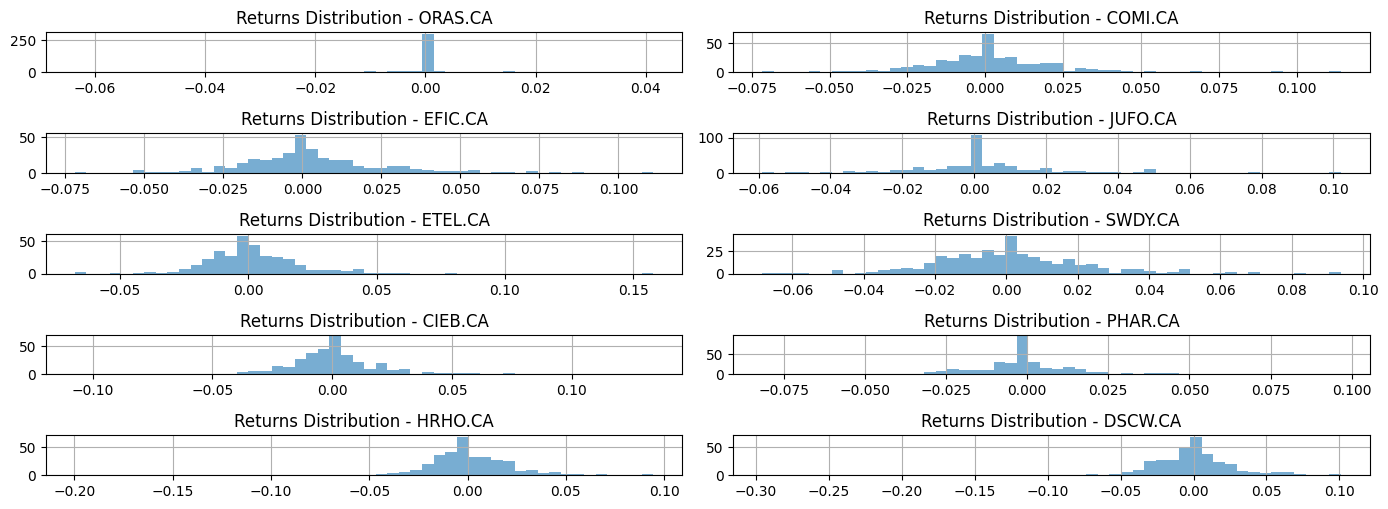

In [13]:
plt.figure(figsize=(14, 10))
for i, ticker in enumerate(egx_tickers):
    plt.subplot(10, 2, i+1)
    returns[ticker].hist(bins=50, alpha=0.6)
    plt.title(f'Returns Distribution - {ticker}')

plt.tight_layout()
plt.show()

the distribution of the volatillity

In [14]:
print("\nLjung-Box Test Results for GARCH Model Residuals")
for ticker in egx_tickers:
    lb_test = acorr_ljungbox(garch_results[ticker].resid, lags=[10], return_df=True)
    print(f"\n{ticker} Ljung-Box Test:\n{lb_test}")


Ljung-Box Test Results for GARCH Model Residuals

ORAS.CA Ljung-Box Test:
      lb_stat  lb_pvalue
10  45.134034   0.000002

COMI.CA Ljung-Box Test:
      lb_stat  lb_pvalue
10  36.336449   0.000074

EFIC.CA Ljung-Box Test:
      lb_stat  lb_pvalue
10  11.864387   0.294235

JUFO.CA Ljung-Box Test:
      lb_stat  lb_pvalue
10  24.207548   0.007068

ETEL.CA Ljung-Box Test:
     lb_stat  lb_pvalue
10  7.427613   0.684552

SWDY.CA Ljung-Box Test:
      lb_stat  lb_pvalue
10  13.367557   0.203841

CIEB.CA Ljung-Box Test:
      lb_stat  lb_pvalue
10  17.776438   0.058854

PHAR.CA Ljung-Box Test:
      lb_stat  lb_pvalue
10  15.486518   0.115305

HRHO.CA Ljung-Box Test:
     lb_stat  lb_pvalue
10  6.090781   0.807579

DSCW.CA Ljung-Box Test:
     lb_stat  lb_pvalue
10  6.278793   0.791322


The above provides the  Ljung  Box test for each of the available tickers present and use for the operations

In [15]:
print("\nSkewness and Kurtosis for Returns and Residuals")
for ticker in egx_tickers:
    returns_skewness = stats.skew(returns[ticker])
    returns_kurtosis = stats.kurtosis(returns[ticker])
    residuals_skewness = stats.skew(garch_results[ticker].resid)
    residuals_kurtosis = stats.kurtosis(garch_results[ticker].resid)
    print(f"\n{ticker} - Returns: Skewness={returns_skewness:.2f}, Kurtosis={returns_kurtosis:.2f}")
    print(f"{ticker} - Residuals: Skewness={residuals_skewness:.2f}, Kurtosis={residuals_kurtosis:.2f}")


Skewness and Kurtosis for Returns and Residuals

ORAS.CA - Returns: Skewness=-1.75, Kurtosis=43.31
ORAS.CA - Residuals: Skewness=-1.75, Kurtosis=43.31

COMI.CA - Returns: Skewness=0.85, Kurtosis=5.21
COMI.CA - Residuals: Skewness=0.85, Kurtosis=5.21

EFIC.CA - Returns: Skewness=0.79, Kurtosis=2.71
EFIC.CA - Residuals: Skewness=0.79, Kurtosis=2.71

JUFO.CA - Returns: Skewness=0.70, Kurtosis=4.14
JUFO.CA - Residuals: Skewness=0.70, Kurtosis=4.14

ETEL.CA - Returns: Skewness=1.68, Kurtosis=12.28
ETEL.CA - Residuals: Skewness=1.68, Kurtosis=12.28

SWDY.CA - Returns: Skewness=0.66, Kurtosis=2.24
SWDY.CA - Residuals: Skewness=0.66, Kurtosis=2.24

CIEB.CA - Returns: Skewness=0.87, Kurtosis=6.75
CIEB.CA - Residuals: Skewness=0.87, Kurtosis=6.75

PHAR.CA - Returns: Skewness=1.02, Kurtosis=7.03
PHAR.CA - Residuals: Skewness=1.02, Kurtosis=7.03

HRHO.CA - Returns: Skewness=-1.09, Kurtosis=17.03
HRHO.CA - Residuals: Skewness=-1.09, Kurtosis=17.03

DSCW.CA - Returns: Skewness=-2.15, Kurtosis=18.45

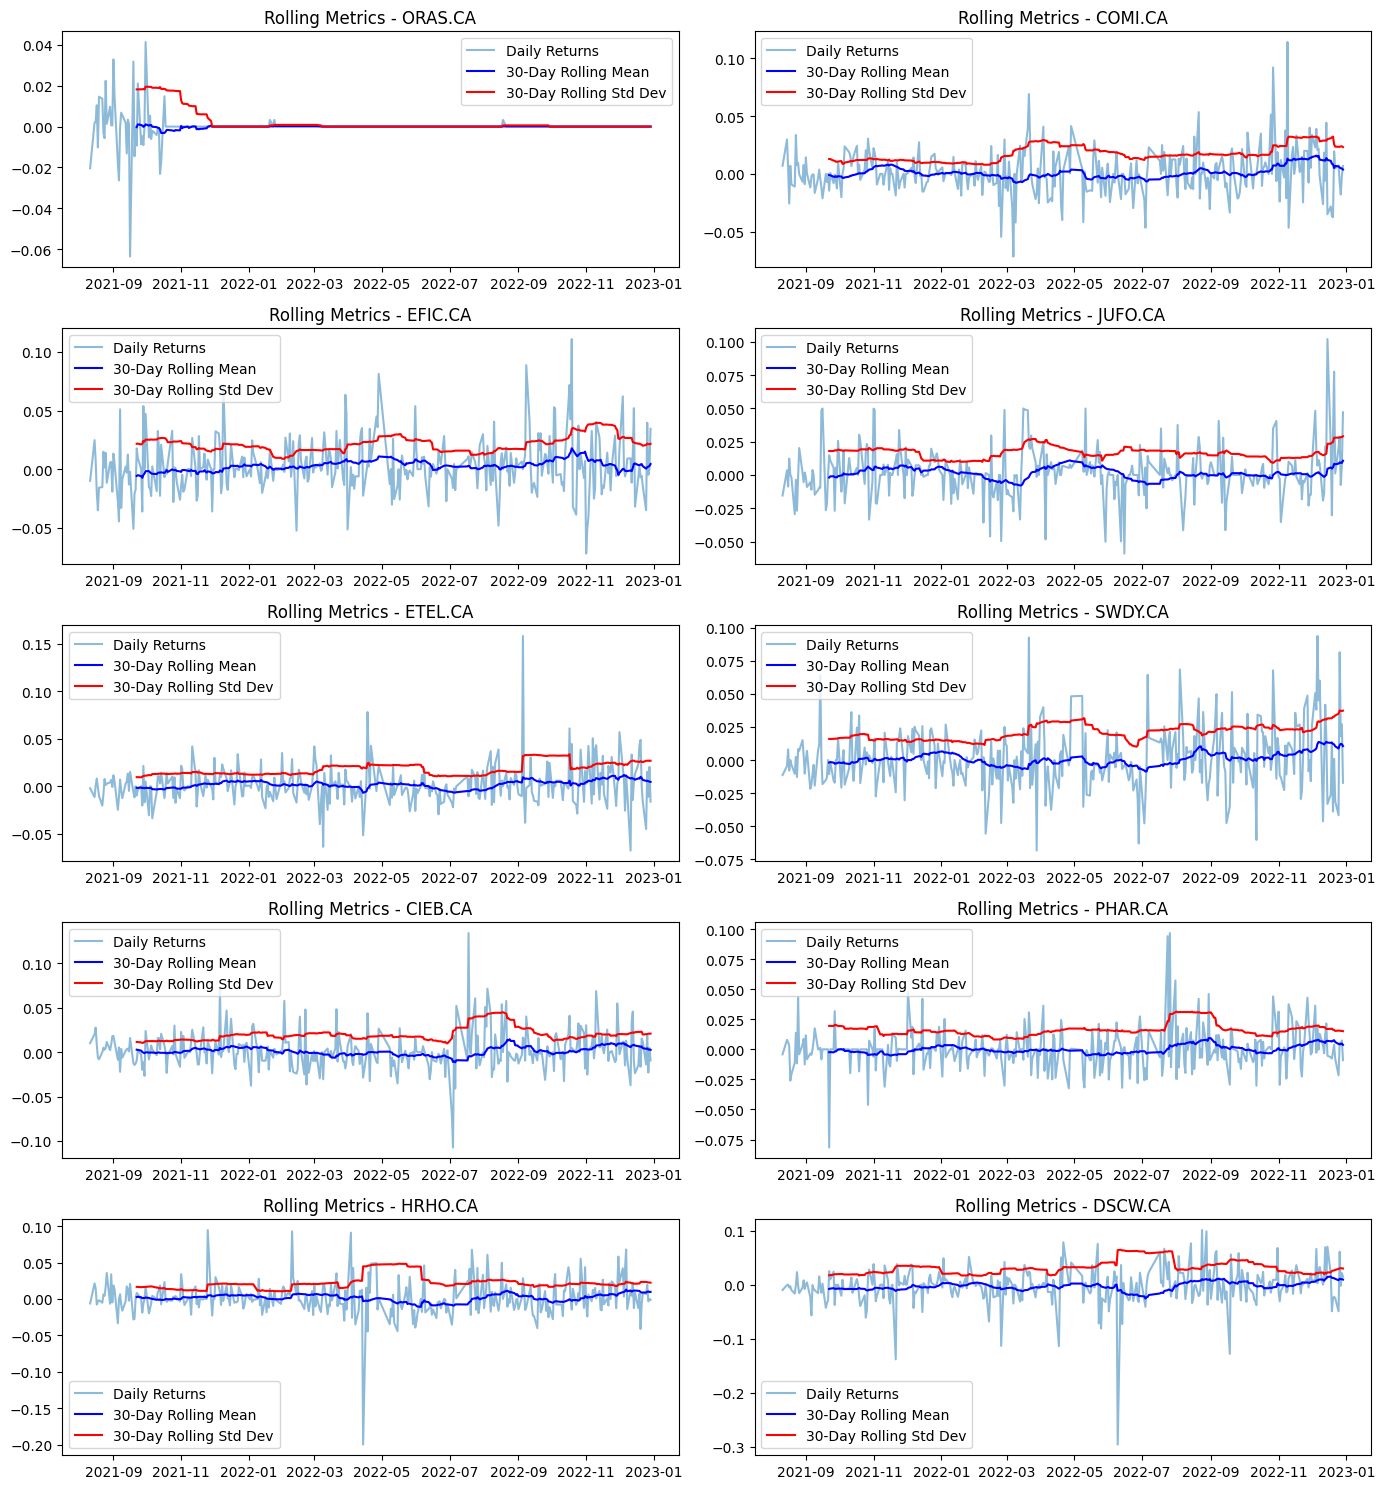

In [16]:
plt.figure(figsize=(14, 15))
for i, ticker in enumerate(egx_tickers):
    plt.subplot(5, 2, i + 1)
    rolling_mean = returns[ticker].rolling(window=30).mean()
    rolling_std = returns[ticker].rolling(window=30).std()
    plt.plot(returns[ticker], label='Daily Returns', alpha=0.5)
    plt.plot(rolling_mean, label='30-Day Rolling Mean', color='blue')
    plt.plot(rolling_std, label='30-Day Rolling Std Dev', color='red')
    plt.title(f'Rolling Metrics - {ticker}')
    plt.legend()

plt.tight_layout()
plt.show()

we get a  rough idea of  rolling mean and  std dev  from the above for each shares

In [17]:
for ticker in egx_tickers:
    print(f"\n=== Actual and Predicted Volatility for {ticker} ===")
    actual_returns = returns[ticker]
    predicted_volatility = garch_results[ticker].conditional_volatility
    combined_df = pd.DataFrame({
        'Actual Returns': actual_returns,
        'Predicted Volatility': predicted_volatility
    })
    print(combined_df)


=== Actual and Predicted Volatility for ORAS.CA ===
                           Actual Returns  Predicted Volatility
Date                                                           
2021-08-11 00:00:00+00:00       -0.020400              0.014877
2021-08-15 00:00:00+00:00        0.001984              0.016021
2021-08-16 00:00:00+00:00        0.002262              0.014204
2021-08-17 00:00:00+00:00        0.010439              0.012616
2021-08-18 00:00:00+00:00       -0.010191              0.012111
...                                   ...                   ...
2022-12-25 00:00:00+00:00        0.000000              0.001869
2022-12-26 00:00:00+00:00        0.000000              0.001869
2022-12-27 00:00:00+00:00        0.000000              0.001869
2022-12-28 00:00:00+00:00        0.000000              0.001869
2022-12-29 00:00:00+00:00        0.000000              0.001869

[343 rows x 2 columns]

=== Actual and Predicted Volatility for COMI.CA ===
                           Actual Retu

**Conclusion:**

we  have applied the   garch model  over the  huge amount of cairo shares data and thus  used many tests and  visualizations to get the  efficeint  results